In [1]:
import pandas as pd
import numpy as np
import re

# Load the dataset
df = pd.read_csv("zameen_rentals_data.csv")

# 1. Remove exact duplicates
df = df.drop_duplicates()

# 2. Parse 'Price' column (e.g., "75 Thousand", "2.5 Lakh" → 75000, 250000)
def parse_price(price_str):
    price_str = str(price_str).lower().strip()
    if 'lakh' in price_str:
        return float(re.sub(r'[^\d.]', '', price_str)) * 100000
    elif 'thousand' in price_str:
        return float(re.sub(r'[^\d.]', '', price_str)) * 1000
    elif 'crore' in price_str:
        return float(re.sub(r'[^\d.]', '', price_str)) * 10000000
    else:
        try:
            return float(re.sub(r'[^\d.]', '', price_str))
        except:
            return np.nan

df['Price'] = df['Price'].apply(parse_price)

# 3. Parse 'Marla' column (e.g., "1 Kanal" → 20 Marla)
def parse_marla(marla_str):
    marla_str = str(marla_str).lower().strip()
    if 'kanal' in marla_str:
        return float(re.sub(r'[^\d.]', '', marla_str)) * 20
    elif 'marla' in marla_str:
        return float(re.sub(r'[^\d.]', '', marla_str))
    else:
        try:
            return float(re.sub(r'[^\d.]', '', marla_str))
        except:
            return np.nan

df['Marla'] = df['Marla'].apply(parse_marla)

# 4. Convert 'Bedrooms' and 'Washrooms' to numeric
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'], errors='coerce')
df['Washrooms'] = pd.to_numeric(df['Washrooms'], errors='coerce')

# 5. Impute missing values using median
df['Price'].fillna(df['Price'].median(), inplace=True)
df['Marla'].fillna(df['Marla'].median(), inplace=True)
df['Bedrooms'].fillna(df['Bedrooms'].median(), inplace=True)
df['Washrooms'].fillna(df['Washrooms'].median(), inplace=True)

# 6. Final check (optional)
print("Missing values after cleaning:")
print(df.isnull().sum())

# Optional: Save the cleaned dataset
df.to_csv("zameen_rentals_cleaned.csv", index=False)


<ipython-input-1-00b7b247bb2e>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].apply(parse_price)
<ipython-input-1-00b7b247bb2e>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marla'] = df['Marla'].apply(parse_marla)
<ipython-input-1-00b7b247bb2e>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

Missing values after cleaning:
Price        0
Currency     0
Location     0
Bedrooms     0
Washrooms    0
Marla        0
Details      0
dtype: int64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd  # Optional, for detailed maps

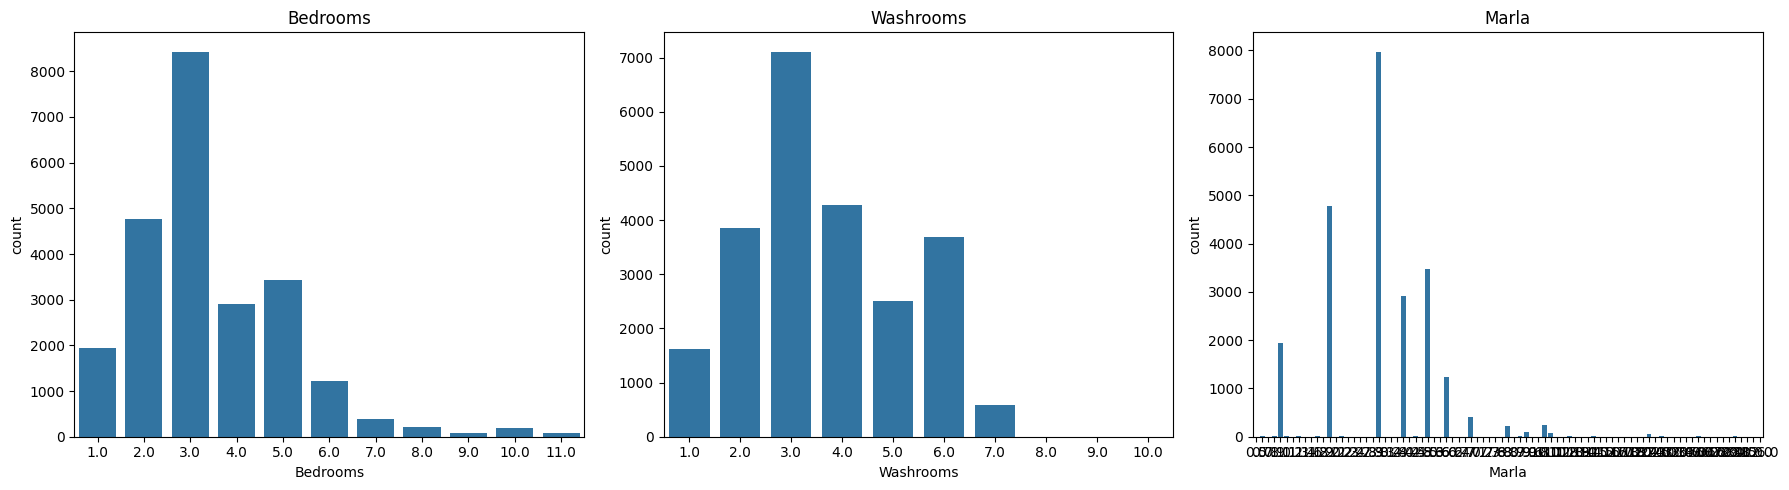

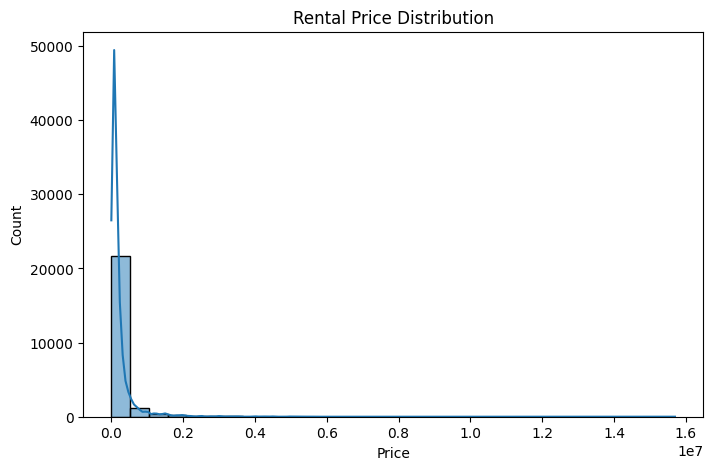

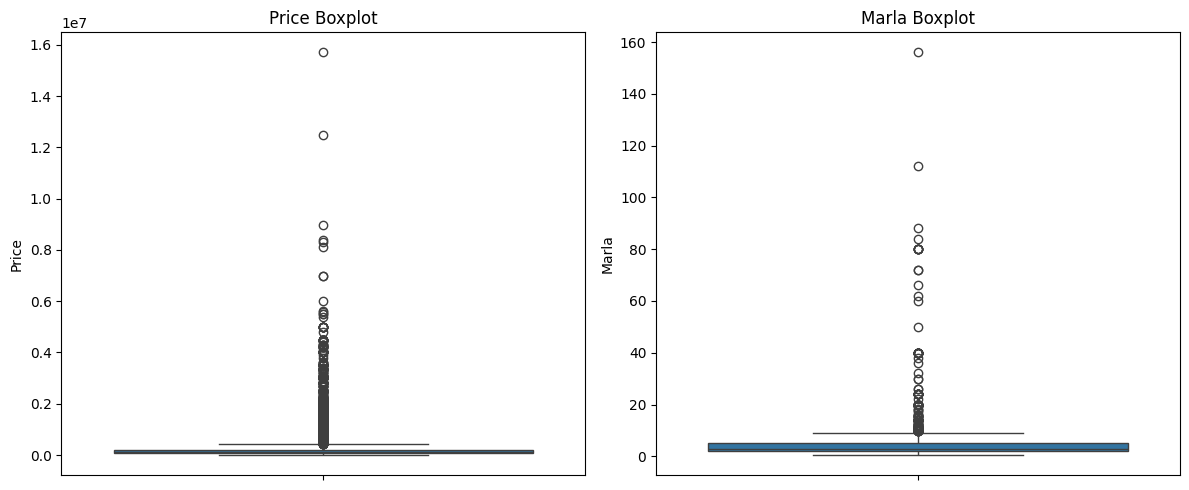

In [4]:

# Bar charts for categorical counts
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='Bedrooms', data=df, ax=axes[0])
sns.countplot(x='Washrooms', data=df, ax=axes[1])
sns.countplot(x='Marla', data=df, ax=axes[2])
axes[0].set_title('Bedrooms')
axes[1].set_title('Washrooms')
axes[2].set_title('Marla')
plt.tight_layout()
plt.show()

# Histogram for Price
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Rental Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Boxplots for Price and Marla
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y='Price', data=df, ax=axes[0])
sns.boxplot(y='Marla', data=df, ax=axes[1])
axes[0].set_title('Price Boxplot')
axes[1].set_title('Marla Boxplot')
plt.tight_layout()
plt.show()


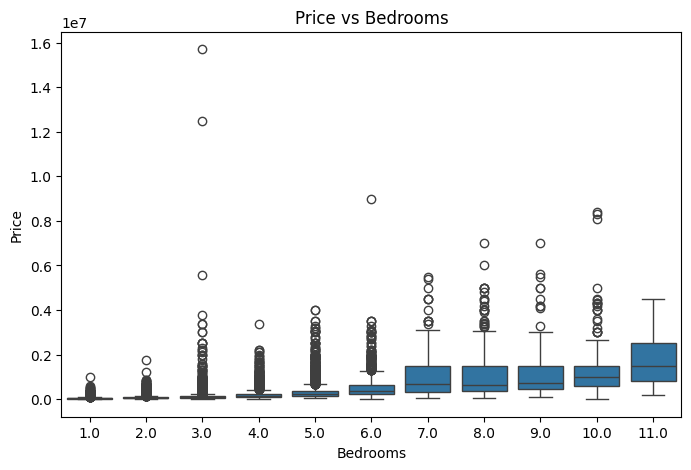

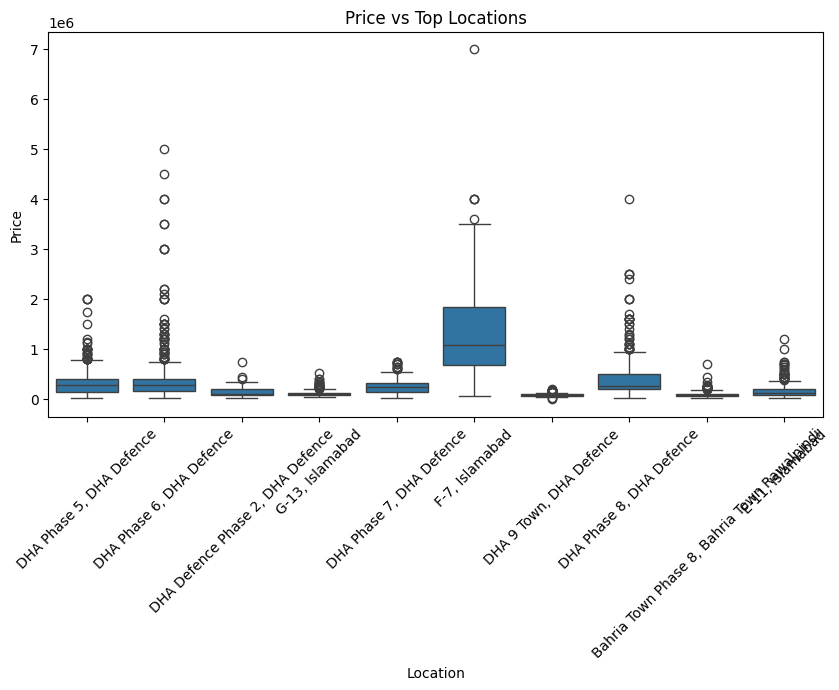

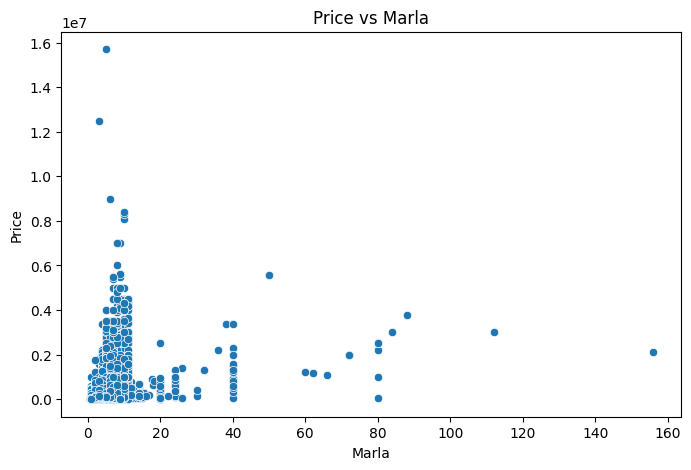

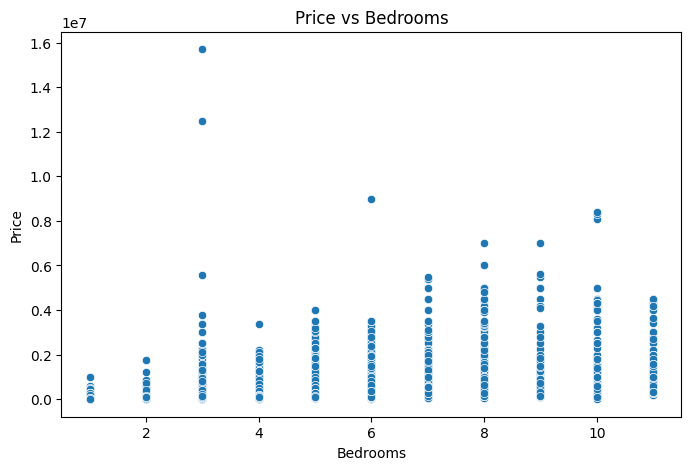

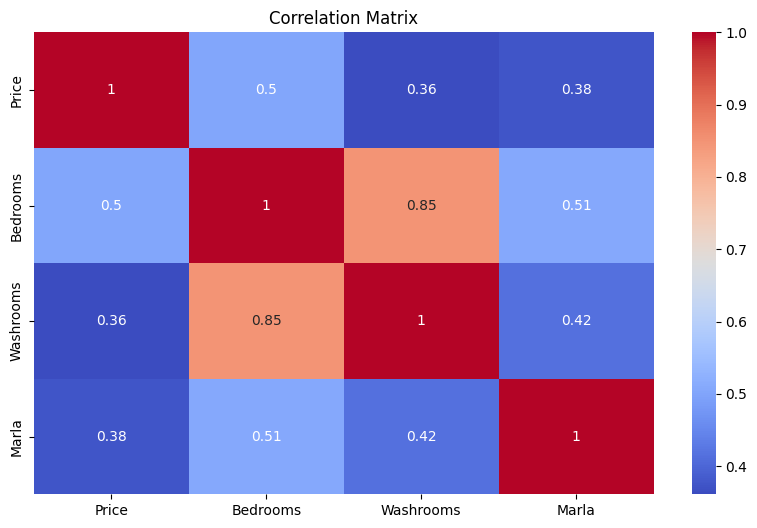

In [5]:
# Boxplot: Price vs Bedrooms
plt.figure(figsize=(8, 5))
sns.boxplot(x='Bedrooms', y='Price', data=df)
plt.title('Price vs Bedrooms')
plt.show()

# Boxplot: Price vs Location
plt.figure(figsize=(10, 5))
top_locations = df['Location'].value_counts().nlargest(10).index
sns.boxplot(x='Location', y='Price', data=df[df['Location'].isin(top_locations)])
plt.xticks(rotation=45)
plt.title('Price vs Top Locations')
plt.show()

# Scatter plots
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Marla', y='Price', data=df)
plt.title('Price vs Marla')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Bedrooms', y='Price', data=df)
plt.title('Price vs Bedrooms')
plt.show()

# Correlation heatmap
numeric_cols = df.select_dtypes(include='number')
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

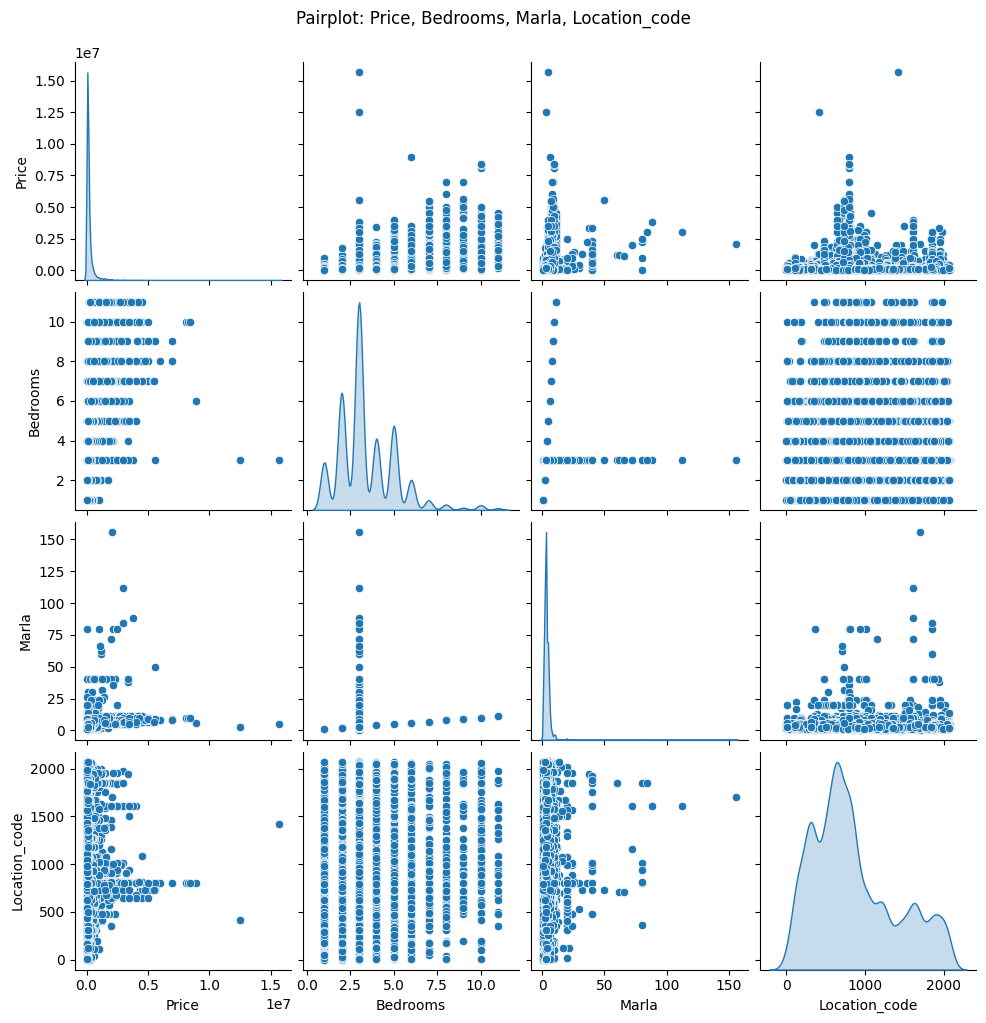

In [6]:
# Encode 'Location' as categorical codes
df['Location_code'] = df['Location'].astype('category').cat.codes

# Select relevant numeric features
pairplot_df = df[['Price', 'Bedrooms', 'Marla', 'Location_code']].dropna()

# Generate the pairplot
sns.pairplot(pairplot_df, diag_kind='kde')
plt.suptitle('Pairplot: Price, Bedrooms, Marla, Location_code', y=1.02)
plt.show()


<ipython-input-8-dc7532f98f9b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_avg.values, y=area_avg.index, palette='Reds_r')


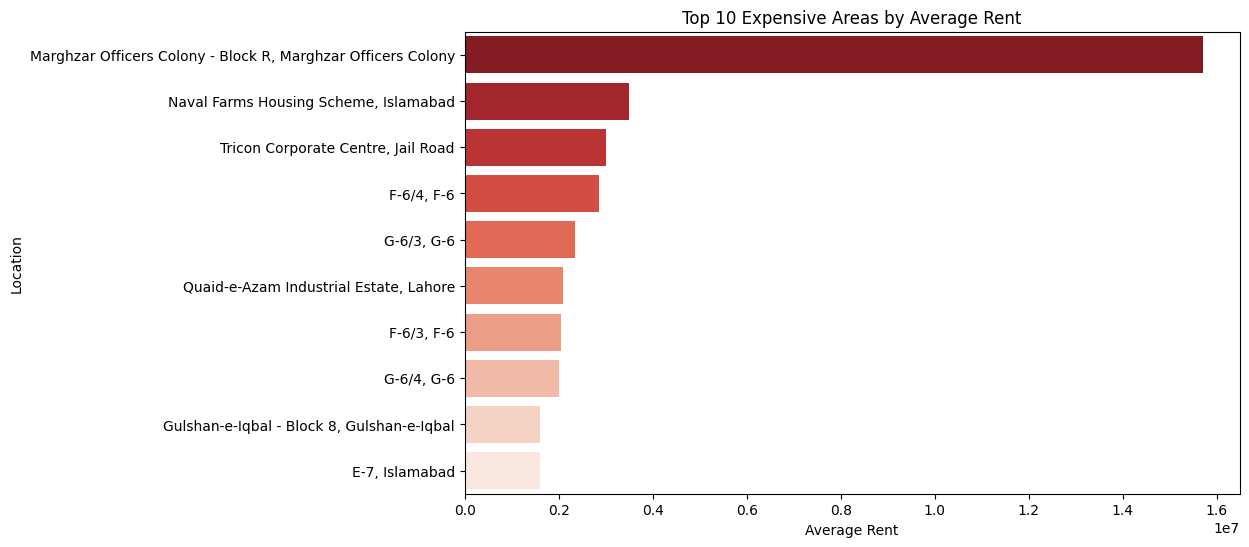

In [8]:
# Group by area and calculate average rent
area_avg = df.groupby('Location')['Price'].mean().sort_values(ascending=False).head(10)

# Bar chart of Top 10 expensive areas
plt.figure(figsize=(10, 6))
sns.barplot(x=area_avg.values, y=area_avg.index, palette='Reds_r')
plt.title('Top 10 Expensive Areas by Average Rent')
plt.xlabel('Average Rent')
plt.ylabel('Location')
plt.show()


In [3]:
import pandas as pd
import plotly.express as px
import numpy as np

# Sample DataFrame for reference
df = pd.read_csv("zameen_rentals_cleaned.csv")

# Group by 'Location' to get average price and listing count
area_data = df.groupby('Location').agg({
    'Price': 'mean',
    'Location': 'count'
}).rename(columns={'Price': 'Avg_Price', 'Location': 'Listing_Count'}).reset_index()

# Assign random or approximate coordinates to locations (for visualization purposes)
# Use a range of latitudes and longitudes for different areas (just an example)
np.random.seed(42)  # For reproducibility
area_data['Latitude'] = np.random.uniform(24.5, 25.5, size=len(area_data))  # Approx. latitudes
area_data['Longitude'] = np.random.uniform(67.5, 68.5, size=len(area_data))  # Approx. longitudes

# Create Bubble Map using Plotly (without coordinates)
fig = px.scatter_mapbox(
    area_data,
    lat="Latitude",
    lon="Longitude",
    size="Avg_Price",
    color="Avg_Price",
    hover_name="Location",
    hover_data=["Avg_Price", "Listing_Count"],
    color_continuous_scale="YlOrRd",
    size_max=40,
    zoom=10,
    title="Average Rent by Area (Bubble Map)",
    mapbox_style="carto-positron"
)

# Show the plot
fig.show()


In [14]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")


Linear Regression MSE: 0.42982461291923496


In [8]:
# Random Forest Regressor with LabelEncoded Location
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Handle missing values in Location
df['Location'] = df['Location'].fillna('Unknown')

# Encode Location
le = LabelEncoder()
df['Location_code'] = le.fit_transform(df['Location'])

# Prepare features and target
X = df[['Bedrooms', 'Washrooms', 'Marla', 'Location_code']]
y = np.log1p(df['Price'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest MSE: {mse}")


Random Forest MSE: 0.18461078560180363


In [9]:
# XGBoost Regressor with LabelEncoded Location
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Handle missing values
df['Location'] = df['Location'].fillna('Unknown')

# Encode Location
le = LabelEncoder()
df['Location_code'] = le.fit_transform(df['Location'])

# Prepare features and target
X = df[['Bedrooms', 'Washrooms', 'Marla', 'Location_code']]
y = np.log1p(df['Price'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
xgb_model = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"XGBoost MSE: {mse}")


XGBoost MSE: 0.20756547914388201


In [7]:
# Gradient Boosting Regressor with LabelEncoded Location
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Step 1: Handle missing values in Location
df['Location'] = df['Location'].fillna('Unknown')

# Step 2: Encode the Location column
le = LabelEncoder()
df['Location_code'] = le.fit_transform(df['Location'])

# Step 3: Prepare features and target variable
X = df[['Bedrooms', 'Washrooms', 'Marla', 'Location_code']]
y = np.log1p(df['Price'])  # log-transform to reduce skew

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train model
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = gbr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Gradient Boosting MSE: {mse}")


Gradient Boosting MSE: 0.2645364135599211


In [11]:
#Lasso/Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
# Initialize and train model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Lasso Regression MSE: {mse}")

# Initialize and train model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Ridge Regression MSE: {mse}")


Lasso Regression MSE: 0.5104537959618043
Ridge Regression MSE: 0.5074517712506385


In [ ]:
#comparison

In [16]:

# Store results in a DataFrame
model_results = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Gradient Boosting', 'Lasso Regression', 'Ridge Regression'],
    'MSE': [linear_mse, rf_mse, xgb_mse, gbr_mse, lasso_mse, ridge_mse]
}

# Create and sort DataFrame
comparison_df = pd.DataFrame(model_results)
comparison_df_sorted = comparison_df.sort_values(by='MSE')

# Display comparison
print(comparison_df_sorted)


               Model       MSE
1      Random Forest  0.184611
2            XGBoost  0.207565
3  Gradient Boosting  0.264536
5   Ridge Regression  0.507452
0  Linear Regression  0.507452
4   Lasso Regression  0.510454


In [27]:
#Updated hyperprarameters comparison

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# Load and preprocess data
df = pd.read_csv("zameen_rentals_cleaned.csv")
df = df.drop(columns=['Currency', 'Details'])
df_encoded = pd.get_dummies(df, columns=['Location'], drop_first=True)

X = df_encoded.drop(columns=['Price'])
y = np.log1p(df_encoded['Price'])  # log-transform

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define simplified models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, max_depth=3, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=50, max_depth=3, eval_metric='rmse', verbosity=0, random_state=42)
}

# Evaluate and store results
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results.append({"Model": name, "MSE": mse})

# Output results
results_df = pd.DataFrame(results).sort_values(by="MSE")
print("\nModel Comparison (Optimized):")
print(results_df)



Model Comparison (Optimized):
               Model       MSE
0  Linear Regression  0.159776
1              Ridge  0.160563
5            XGBoost  0.289279
3      Random Forest  0.348512
4  Gradient Boosting  0.366809
2              Lasso  0.467642


In [ ]:
#CLassification models

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load data
df = pd.read_csv("zameen_rentals_cleaned.csv")

# Bin price into categories
df['Price_Category'] = pd.qcut(df['Price'], q=3, labels=['Low', 'Medium', 'High'])

# Drop non-numeric / irrelevant columns
df = df.drop(columns=['Currency', 'Details'])

# One-hot encode 'Location'
df_encoded = pd.get_dummies(df, columns=['Location'], drop_first=True)

# Features and target
X = df_encoded.drop(columns=['Price', 'Price_Category'])
y = df_encoded['Price_Category']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7927680270670332
              precision    recall  f1-score   support

        High       0.86      0.84      0.85      1490
         Low       0.82      0.81      0.82      1678
      Medium       0.70      0.73      0.71      1561

    accuracy                           0.79      4729
   macro avg       0.79      0.79      0.79      4729
weighted avg       0.79      0.79      0.79      4729



In [21]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.7800803552548108
              precision    recall  f1-score   support

        High       0.85      0.85      0.85      1490
         Low       0.84      0.77      0.80      1678
      Medium       0.67      0.73      0.70      1561

    accuracy                           0.78      4729
   macro avg       0.78      0.78      0.78      4729
weighted avg       0.79      0.78      0.78      4729



In [23]:
#XGBoost
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Train XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train_encoded)

# Predict and evaluate
y_pred = xgb_clf.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test_encoded, y_pred))
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[20:11:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Accuracy: 0.7515330936773102
              precision    recall  f1-score   support

        High       0.84      0.81      0.83      1490
         Low       0.81      0.73      0.77      1678
      Medium       0.63      0.72      0.67      1561

    accuracy                           0.75      4729
   macro avg       0.76      0.75      0.75      4729
weighted avg       0.76      0.75      0.75      4729



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Load data
df = pd.read_csv("zameen_rentals_cleaned.csv")

# Create target variable by binning Price
df['Price_Category'] = pd.qcut(df['Price'], q=3, labels=['Low', 'Medium', 'High'])

# Drop irrelevant/non-numeric columns
df = df.drop(columns=['Currency', 'Details'])

# One-hot encode 'Location'
df_encoded = pd.get_dummies(df, columns=['Location'], drop_first=True)

# Define features and target
X = df_encoded.drop(columns=['Price', 'Price_Category'])
y = df_encoded['Price_Category']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train Linear SVM
svm_clf = LinearSVC(max_iter=10000)
svm_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_clf.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Linear SVM Accuracy: 0.7756396701205329
              precision    recall  f1-score   support

        High       0.82      0.88      0.84      1490
         Low       0.81      0.82      0.81      1678
      Medium       0.70      0.64      0.66      1561

    accuracy                           0.78      4729
   macro avg       0.77      0.78      0.77      4729
weighted avg       0.77      0.78      0.77      4729



In [ ]:
#Comparison

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have your features (X) and target (y) columns already prepared

# Label encode the target variable (Price Category) to numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # This converts 'High', 'Medium', 'Low' into 0, 1, 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),  # Increased max_iter to avoid convergence warning
    'Random Forest Classifier': RandomForestClassifier(),
    'XGBoost Classifier': XGBClassifier(),
    'SVM Classifier': SVC(probability=True)
}

# Dictionary to store results
results = []

# Train, predict, and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # If the model is capable of calculating the ROC AUC score
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)
        # For multiclass, we need to specify the multi_class parameter as 'ovr' (One-vs-Rest)
        roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
    else:
        roc_auc = 'N/A'

    # Store the results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc
    })

# Create a DataFrame to compare results
comparison_df_classification = pd.DataFrame(results)

# Sort by accuracy
comparison_df_classification_sorted = comparison_df_classification.sort_values(by='Accuracy', ascending=False)

# Display the comparison table
print(comparison_df_classification_sorted)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                      Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
1  Random Forest Classifier  0.777120   0.778806  0.777120  0.777780  0.913257
2        XGBoost Classifier  0.773102   0.773452  0.773102  0.773269  0.915477
0       Logistic Regression  0.602453   0.608991  0.602453  0.604951  0.771546
3            SVM Classifier  0.472193   0.416442  0.472193  0.404689  0.666796


In [2]:
#clustering

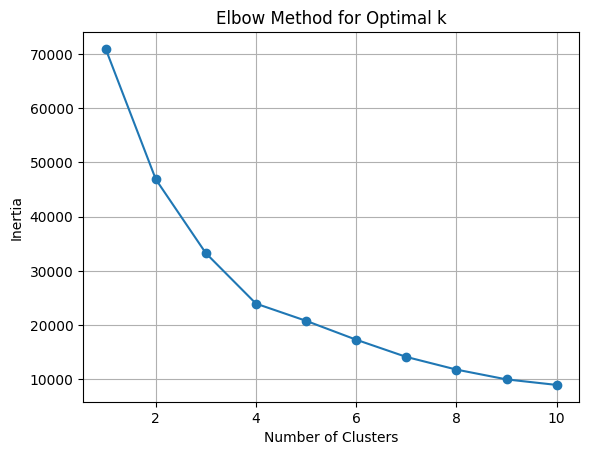

In [23]:
#Kmean
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Features
X_cluster = df[['Price', 'Bedrooms', 'Marla']]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Final model with k=3 (as before or adjust based on elbow)
kmeans_model = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans_model.fit_predict(X_scaled)


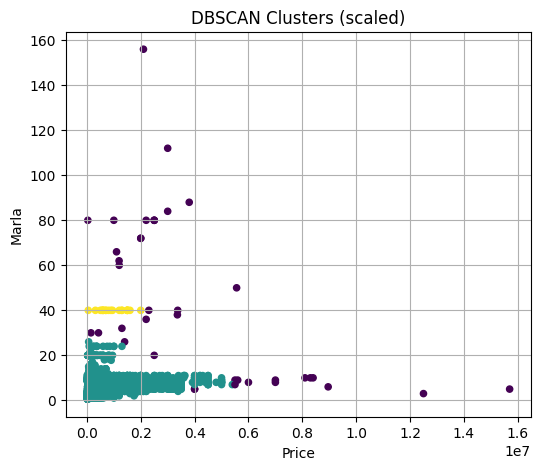

In [24]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Scale data
X_cluster = df[['Price', 'Bedrooms', 'Marla']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# DBSCAN with tuned parameters
dbscan_model = DBSCAN(eps=1.0, min_samples=5)  # Adjust eps after trying several values
df['DBSCAN_Cluster'] = dbscan_model.fit_predict(X_scaled)

# Plotting
plt.figure(figsize=(6, 5))
plt.scatter(df['Price'], df['Marla'], c=df['DBSCAN_Cluster'], cmap='viridis', s=20)
plt.title('DBSCAN Clusters (scaled)')
plt.xlabel('Price')
plt.ylabel('Marla')
plt.grid(True)
plt.show()


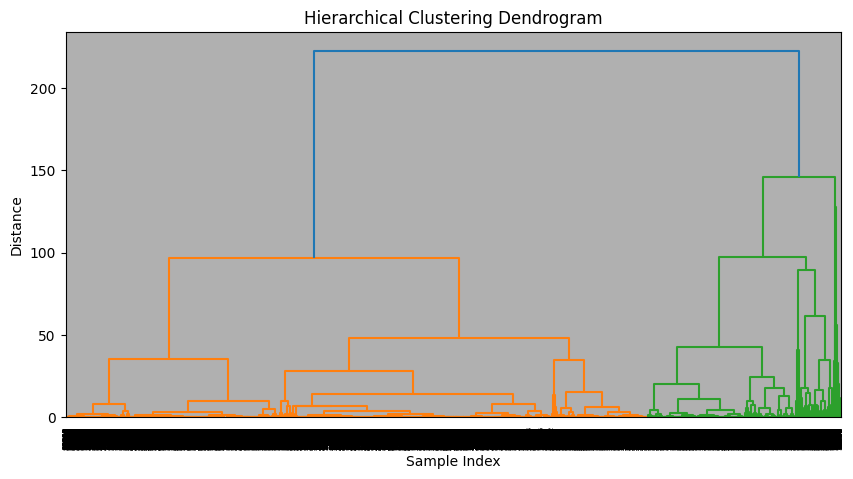

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Scale
X_cluster = df[['Price', 'Bedrooms', 'Marla']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Linkage matrix
Z = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


In [7]:
#Computing Results

In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Load and select relevant features
df = pd.read_csv("zameen_rentals_cleaned.csv")
X_cluster = df[['Price', 'Bedrooms', 'Marla']]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Dictionary to store results
results = []

# --- KMeans ---
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans_model.fit_predict(X_scaled)
results.append({
    'Model': 'KMeans',
    'Silhouette Score': silhouette_score(X_scaled, kmeans_labels),
    'Davies-Bouldin Index': davies_bouldin_score(X_scaled, kmeans_labels)
})

# --- DBSCAN ---
dbscan_model = DBSCAN(eps=1.0, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(X_scaled)

# Filter out noise points (-1) before computing metrics
valid = dbscan_labels != -1
if len(np.unique(dbscan_labels[valid])) > 1:
    sil_score = silhouette_score(X_scaled[valid], dbscan_labels[valid])
    db_score = davies_bouldin_score(X_scaled[valid], dbscan_labels[valid])
else:
    sil_score = np.nan
    db_score = np.nan

results.append({
    'Model': 'DBSCAN',
    'Silhouette Score': sil_score,
    'Davies-Bouldin Index': db_score
})

# --- Hierarchical Clustering ---
Z = linkage(X_scaled, method='ward')
# Cut the dendrogram to form 3 clusters (as in KMeans)
hier_labels = fcluster(Z, 3, criterion='maxclust')
results.append({
    'Model': 'Hierarchical Clustering',
    'Silhouette Score': silhouette_score(X_scaled, hier_labels),
    'Davies-Bouldin Index': davies_bouldin_score(X_scaled, hier_labels)
})

# Convert to DataFrame for display
results_df = pd.DataFrame(results)
print(results_df)

                     Model  Silhouette Score  Davies-Bouldin Index
0                   KMeans          0.558231              0.851675
1                   DBSCAN          0.870179              0.177372
2  Hierarchical Clustering          0.587395              0.800986
